<a href="https://colab.research.google.com/github/RonitShetty/NLP-Labs/blob/main/C070_RonitShetty_NLPLab_TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Lab 10 – Text Analysis**

**Dataset:** BBC News Classification Dataset  
**Name:** Ronit Shetty  
**Roll No:** C070  
**Division:** C  
**SAP ID:** 70322000128

BBC NEWS TEXT CLASSIFICATION

DOWNLOADING BBC NEWS DATASET
replace bbc/entertainment/289.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/262.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/276.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/060.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/074.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/048.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/114.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/100.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/128.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/316.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace bbc/entertainment/302.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
total 80
drwxr-xr-x 7 root root  4096 Oct  6 06:12 .
drwxr-xr-x 1 root root  4096 Oct  6 06:11 ..
drwxr-xr-x 2 root 

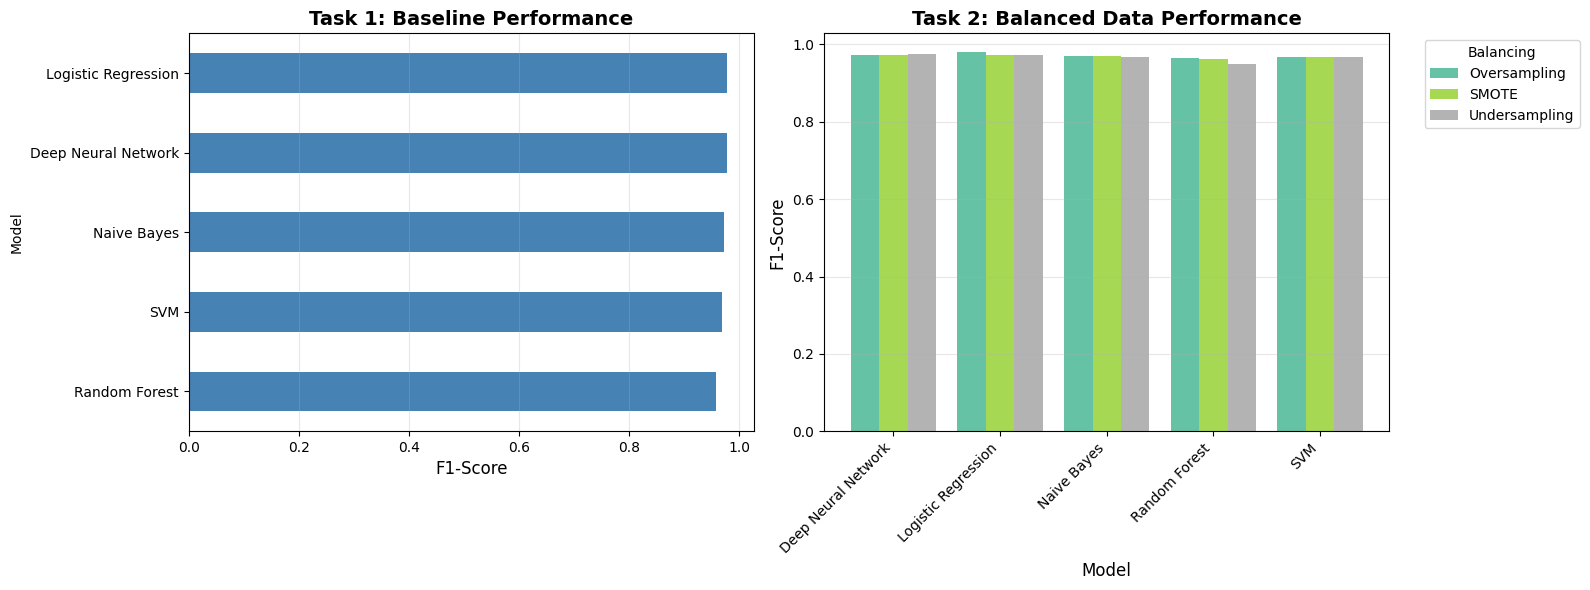

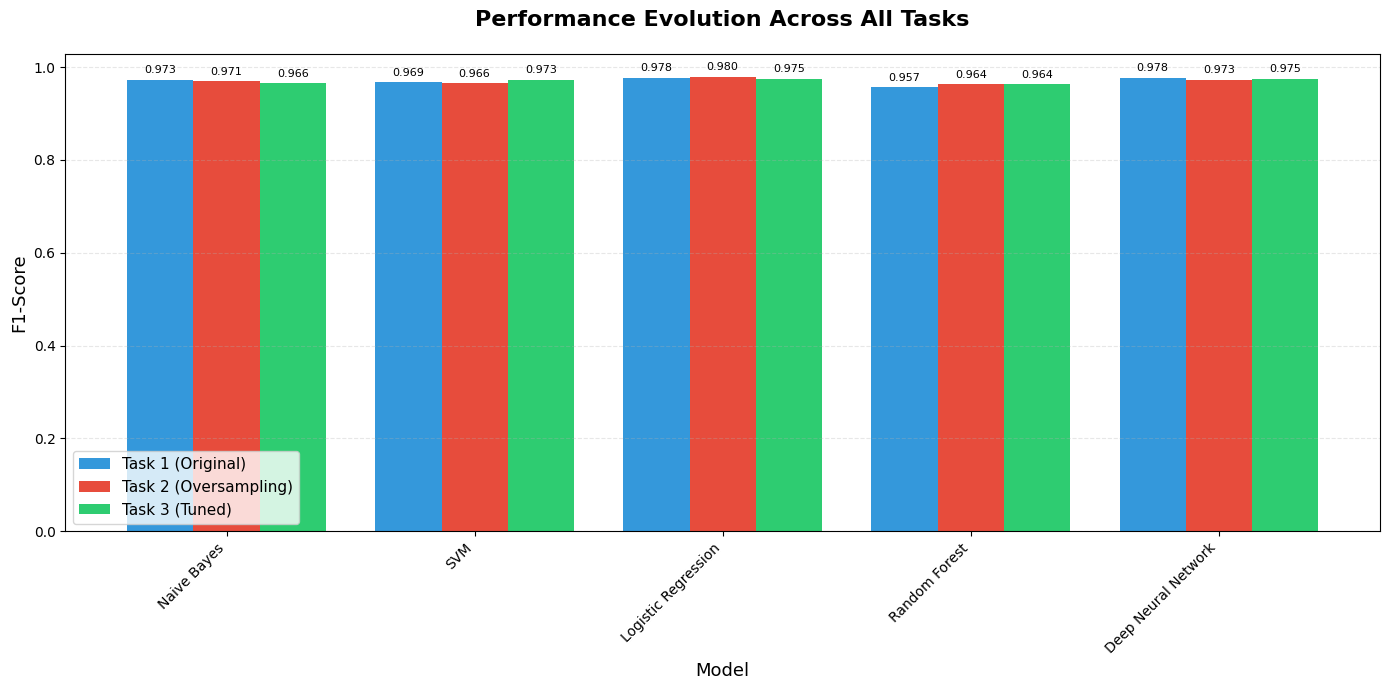


Generating confusion matrix for Logistic Regression...


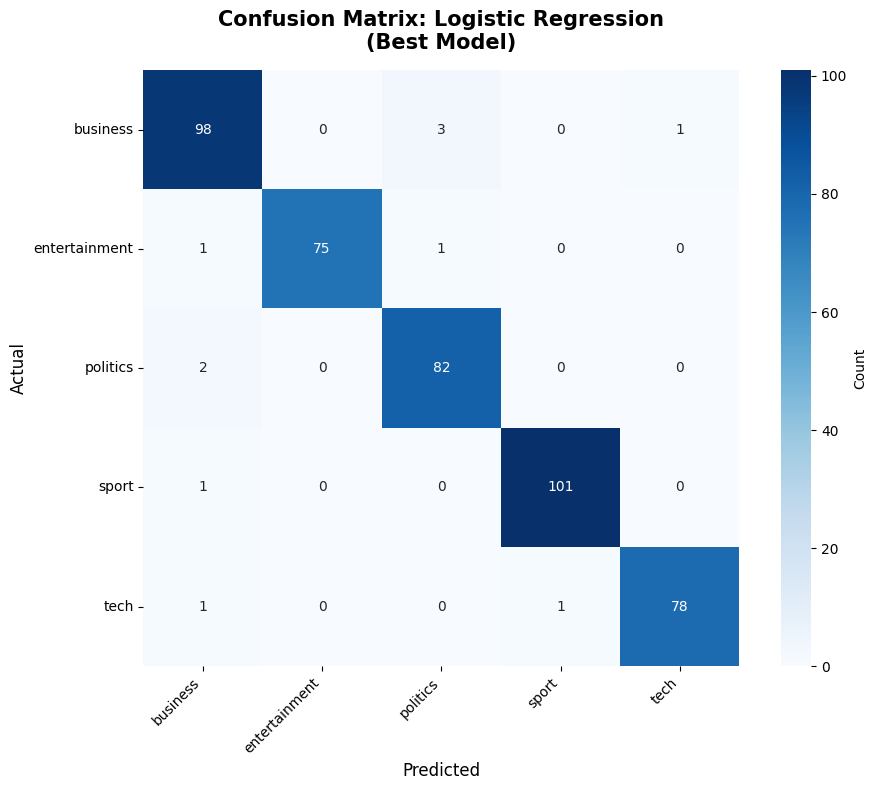


CLASSIFICATION REPORT
               precision    recall  f1-score   support

     business       0.95      0.96      0.96       102
entertainment       1.00      0.97      0.99        77
     politics       0.95      0.98      0.96        84
        sport       0.99      0.99      0.99       102
         tech       0.99      0.97      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



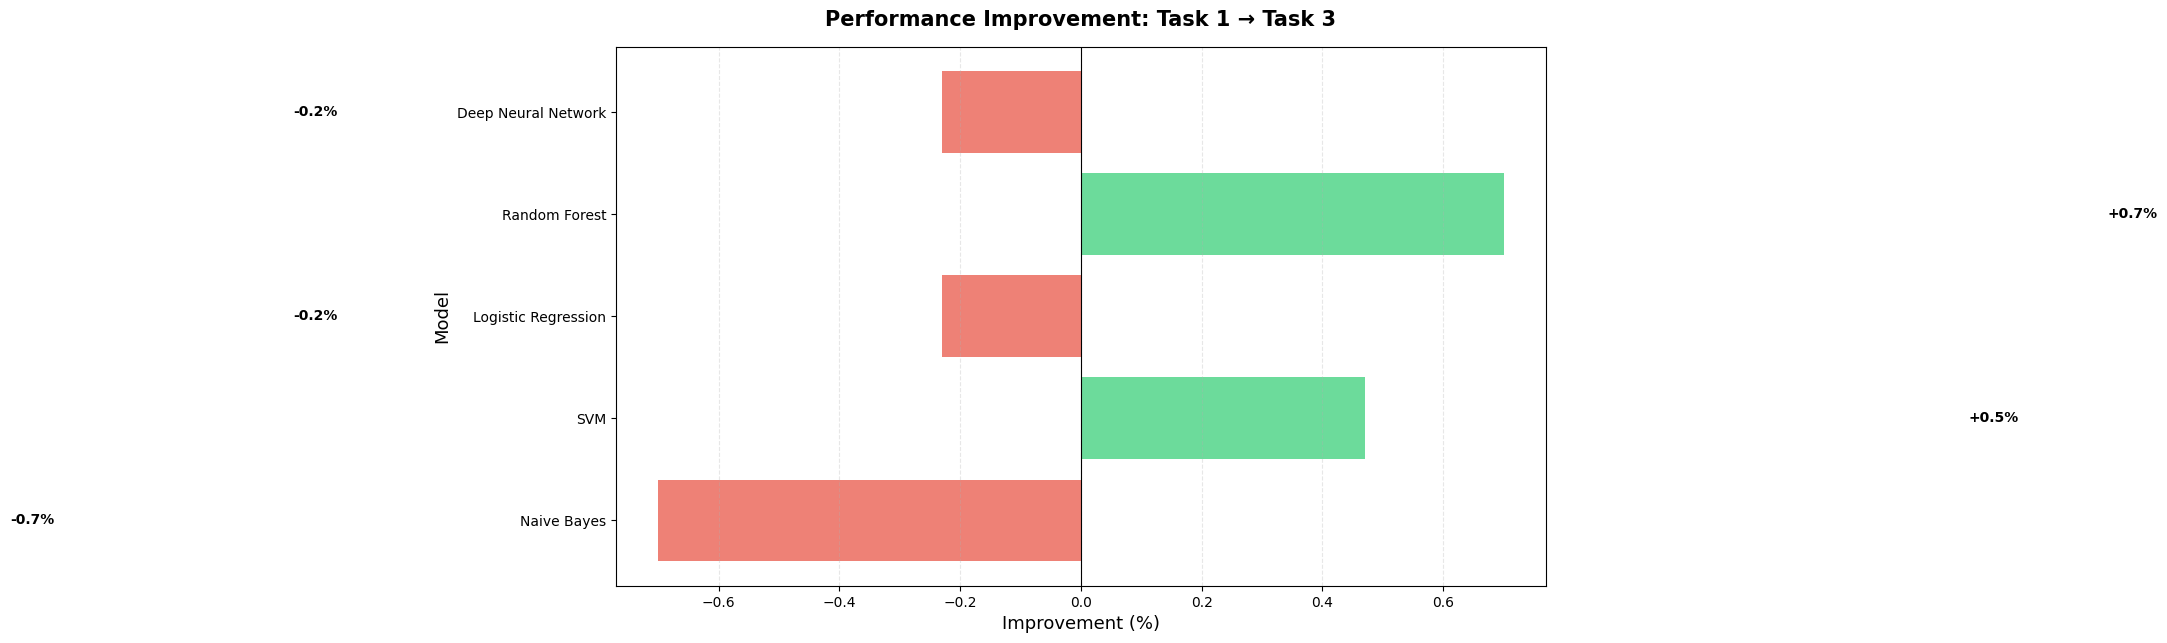

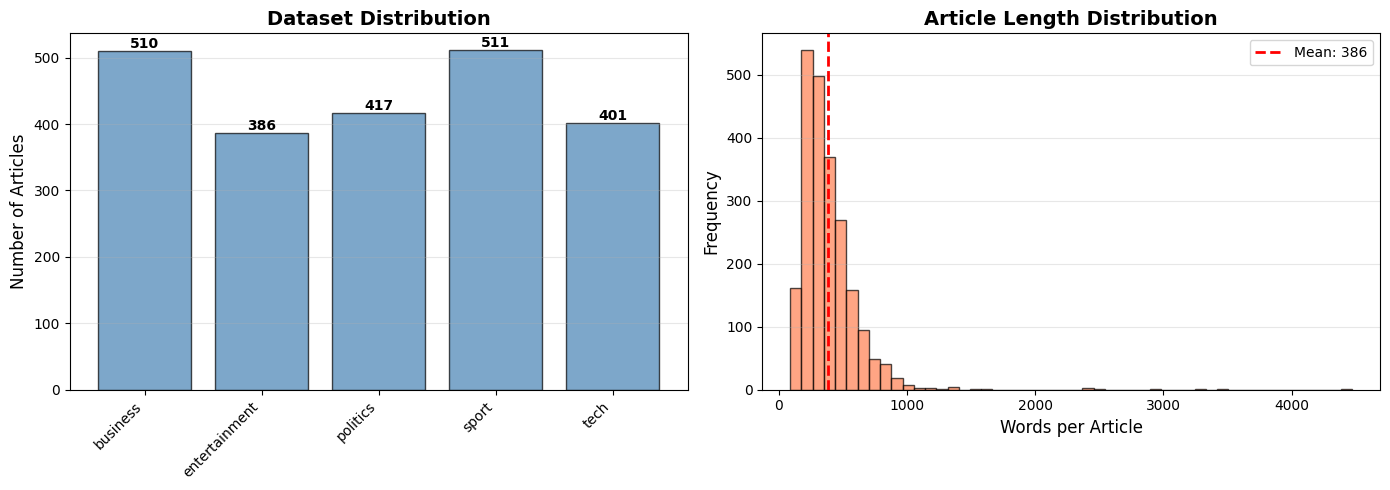


PROJECT COMPLETE

DATASET: BBC News Classification (2,225 articles)
CATEGORIES: business, entertainment, politics, sport, tech

TASKS COMPLETED:
✓ Task 1: Baseline evaluation (5 models)
✓ Task 2: Balanced data (3 methods × 5 models)
✓ Task 3: Hyperparameter tuning (RandomizedSearchCV)

BEST MODEL:
• Name: Logistic Regression
• Balancing: Oversampling
• Accuracy: 0.9753
• F1-Score: 0.9754
• Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 100}

FILES SAVED:
• Task1_Baseline_Results.csv
• Task2_Balanced_Results.csv
• Task3_Tuned_Results.csv
• Final_Comparison.csv
• Task1_vs_Task2_Comparison.png
• All_Tasks_Comparison.png
• Best_Model_Confusion_Matrix.png
• Improvement_Chart.png
• Dataset_Distribution.png

Completed at: 2025-10-06 06:17:09



In [4]:
"""
BBC News Classification - Complete NLP Text Classification Project
Dataset: BBC News (5 categories: business, entertainment, politics, sport, tech)
Tasks: Baseline → Balanced Data → Hyperparameter Tuning
"""

# ============================================================================
# INSTALLATION & IMPORTS
# ============================================================================
!pip install imbalanced-learn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import warnings
import re
import os
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix
)

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Balancing
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

def print_time(msg):
    print(f"[{datetime.now().strftime('%H:%M:%S')}] {msg}")

print("="*80)
print("BBC NEWS TEXT CLASSIFICATION")
print("="*80)

# ============================================================================
# DOWNLOAD DATASET
# ============================================================================
print("\n" + "="*80)
print("DOWNLOADING BBC NEWS DATASET")
print("="*80)

!wget -q http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
!unzip -q bbc-fulltext.zip
!ls -la bbc/

print("✓ Dataset downloaded!")
print("\nCategories: business, entertainment, politics, sport, tech")

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n" + "="*80)
print("LOADING DATA")
print("="*80)
print_time("Starting...")

data = []
labels = []
categories = ['business', 'entertainment', 'politics', 'sport', 'tech']

for category in categories:
    category_path = f'bbc/{category}'
    if os.path.exists(category_path):
        files = os.listdir(category_path)
        print(f"Loading {category}: {len(files)} articles")

        for filename in files:
            if filename.endswith('.txt'):
                with open(f'{category_path}/{filename}', 'r', encoding='latin-1') as f:
                    text = f.read()
                    data.append(text)
                    labels.append(category)

df = pd.DataFrame({'text': data, 'category': labels})
print(f"\nTotal articles: {len(df):,}")
print(f"\nClass distribution:\n{df['category'].value_counts().sort_index()}")
print_time("Loading complete")

# ============================================================================
# PREPROCESSING
# ============================================================================
print("\n" + "="*80)
print("TEXT PREPROCESSING")
print("="*80)
print_time("Starting...")

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text if len(text.split()) >= 5 else ""

df['text_clean'] = df['text'].apply(preprocess_text)
df = df[df['text_clean'] != ''].reset_index(drop=True)

print(f"After cleaning: {len(df):,} articles")
print(f"Avg length: {df['text_clean'].str.len().mean():.0f} chars")
print(f"Avg words: {df['text_clean'].str.split().str.len().mean():.0f}")

# Encode labels
label_mapping = {cat: idx for idx, cat in enumerate(sorted(df['category'].unique()))}
df['label'] = df['category'].map(label_mapping)
print(f"\nLabel mapping: {label_mapping}")
print_time("Preprocessing complete")

# ============================================================================
# TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text_clean'].values,
    df['label'].values,
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

print(f"Training: {len(X_train_text):,}")
print(f"Testing: {len(X_test_text):,}")
print(f"\nTrain distribution: {dict(Counter(y_train))}")
print(f"Test distribution: {dict(Counter(y_test))}")

# ============================================================================
# FEATURE EXTRACTION
# ============================================================================
print("\n" + "="*80)
print("FEATURE EXTRACTION (TF-IDF)")
print("="*80)
print_time("Vectorizing...")

tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    stop_words='english'
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

print(f"Feature matrix: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Sparsity: {(1.0 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])) * 100:.2f}%")
print_time("Vectorization complete")

# ============================================================================
# DEFINE MODELS
# ============================================================================
print("\n" + "="*80)
print("DEFINING MODELS")
print("="*80)

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50, random_state=42, early_stopping=True)
}

print(f"Models: {list(models.keys())}")

# ============================================================================
# TASK 1: BASELINE EVALUATION
# ============================================================================
print("\n" + "="*80)
print("TASK 1: BASELINE EVALUATION")
print("="*80)
print_time("Starting Task 1...")

results_task1 = []

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    start = datetime.now()

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    results_task1.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    elapsed = (datetime.now() - start).total_seconds()
    print(f"  Accuracy: {acc:.4f} | F1: {f1:.4f} | Time: {elapsed:.1f}s")

df_results_task1 = pd.DataFrame(results_task1)
df_results_task1.to_csv('Task1_Baseline_Results.csv', index=False)

print("\n" + "="*80)
print("TASK 1 RESULTS")
print("="*80)
print(df_results_task1.to_string(index=False))
print_time("Task 1 complete")

# ============================================================================
# CLASS BALANCING
# ============================================================================
print("\n" + "="*80)
print("CLASS BALANCING")
print("="*80)
print_time("Starting...")

print(f"Original: {Counter(y_train)}")
balanced_datasets = {}

# Oversampling
print("\n1. Oversampling...")
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train_tfidf, y_train)
balanced_datasets['Oversampling'] = (X_over, y_over)
print(f"   After: {Counter(y_over)}")

# Undersampling
print("\n2. Undersampling...")
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train_tfidf, y_train)
balanced_datasets['Undersampling'] = (X_under, y_under)
print(f"   After: {Counter(y_under)}")

# SMOTE
print("\n3. SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=3)
X_smote, y_smote = smote.fit_resample(X_train_tfidf, y_train)
balanced_datasets['SMOTE'] = (X_smote, y_smote)
print(f"   After: {Counter(y_smote)}")

print_time("Balancing complete")

# ============================================================================
# TASK 2: BALANCED DATA EVALUATION
# ============================================================================
print("\n" + "="*80)
print("TASK 2: BALANCED DATA EVALUATION")
print("="*80)
print_time("Starting Task 2...")

results_task2 = []

for balance_method, (X_bal, y_bal) in balanced_datasets.items():
    print(f"\n{balance_method}:")

    for model_name, model in models.items():
        print(f"  {model_name}...", end=" ")
        start = datetime.now()

        model.fit(X_bal, y_bal)
        y_pred = model.predict(X_test_tfidf)

        acc = accuracy_score(y_test, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

        results_task2.append({
            'Balancing': balance_method,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1
        })

        elapsed = (datetime.now() - start).total_seconds()
        print(f"F1: {f1:.4f} ({elapsed:.1f}s)")

df_results_task2 = pd.DataFrame(results_task2)
df_results_task2.to_csv('Task2_Balanced_Results.csv', index=False)

print("\n" + "="*80)
print("TASK 2 RESULTS")
print("="*80)
print(df_results_task2.to_string(index=False))

best_per_method = df_results_task2.loc[df_results_task2.groupby('Balancing')['F1-Score'].idxmax()]
print("\nBest per balancing method:")
print(best_per_method[['Balancing', 'Model', 'F1-Score']].to_string(index=False))

best_balance = best_per_method.loc[best_per_method['F1-Score'].idxmax(), 'Balancing']
print(f"\nBest balancing: {best_balance}")
print_time("Task 2 complete")

# ============================================================================
# TASK 3: HYPERPARAMETER TUNING
# ============================================================================
print("\n" + "="*80)
print("TASK 3: HYPERPARAMETER TUNING")
print("="*80)
print(f"Using {best_balance}")
print_time("Starting Task 3...")

X_best, y_best = balanced_datasets[best_balance]

param_distributions = {
    'Naive Bayes': {
        'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
    },
    'SVM': {
        'C': [0.1, 1, 10, 50],
        'kernel': ['linear']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Deep Neural Network': {
        'hidden_layer_sizes': [(64,), (128, 64), (256, 128, 64)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'activation': ['relu', 'tanh']
    }
}

tuned_results = []

for model_name, model in models.items():
    print(f"\n{model_name}:")
    print_time("  Tuning...")
    start = datetime.now()

    random_search = RandomizedSearchCV(
        model,
        param_distributions[model_name],
        n_iter=10,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    random_search.fit(X_best, y_best)

    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    tuned_results.append({
        'Model': model_name,
        'Best Params': str(random_search.best_params_),
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    elapsed = (datetime.now() - start).total_seconds()
    print(f"  Params: {random_search.best_params_}")
    print(f"  F1: {f1:.4f} | Time: {elapsed:.1f}s")

df_tuned = pd.DataFrame(tuned_results)
df_tuned.to_csv('Task3_Tuned_Results.csv', index=False)

print("\n" + "="*80)
print("TASK 3 RESULTS")
print("="*80)
print(df_tuned[['Model', 'Accuracy', 'F1-Score']].to_string(index=False))
print_time("Task 3 complete")

# ============================================================================
# FINAL COMPARISON
# ============================================================================
print("\n" + "="*80)
print("FINAL COMPARISON")
print("="*80)

comparison = pd.DataFrame({
    'Model': df_results_task1['Model'],
    'Task1_Original': df_results_task1['F1-Score'].values,
    'Task2_Balanced': df_results_task2[df_results_task2['Balancing'] == best_balance]['F1-Score'].values,
    'Task3_Tuned': df_tuned['F1-Score'].values
})

comparison['Improvement_%'] = ((comparison['Task3_Tuned'] - comparison['Task1_Original']) / comparison['Task1_Original'] * 100).round(2)
comparison.to_csv('Final_Comparison.csv', index=False)
print(comparison.to_string(index=False))

# Best model
best_idx = df_tuned['F1-Score'].idxmax()
best_model_name = df_tuned.loc[best_idx, 'Model']
best_f1 = df_tuned.loc[best_idx, 'F1-Score']
best_acc = df_tuned.loc[best_idx, 'Accuracy']
best_params = df_tuned.loc[best_idx, 'Best Params']

print("\n" + "="*80)
print("🏆 BEST MODEL")
print("="*80)
print(f"Model: {best_model_name}")
print(f"Balancing: {best_balance}")
print(f"Parameters: {best_params}")
print(f"Accuracy: {best_acc:.4f}")
print(f"F1-Score: {best_f1:.4f}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

# 1. Task 1 vs Task 2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
df_results_task1.sort_values('F1-Score', ascending=True).plot(
    x='Model', y='F1-Score', kind='barh', ax=ax1, color='steelblue', legend=False
)
ax1.set_title('Task 1: Baseline Performance', fontsize=14, fontweight='bold')
ax1.set_xlabel('F1-Score', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

ax2 = axes[1]
pivot_data = df_results_task2.pivot(index='Model', columns='Balancing', values='F1-Score')
pivot_data.plot(kind='bar', ax=ax2, width=0.8, colormap='Set2')
ax2.set_title('Task 2: Balanced Data Performance', fontsize=14, fontweight='bold')
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('F1-Score', fontsize=12)
ax2.legend(title='Balancing', bbox_to_anchor=(1.05, 1))
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('Task1_vs_Task2_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. All tasks comparison
fig, ax = plt.subplots(figsize=(14, 7))
comparison.set_index('Model')[['Task1_Original', 'Task2_Balanced', 'Task3_Tuned']].plot(
    kind='bar', ax=ax, width=0.8, color=['#3498db', '#e74c3c', '#2ecc71']
)
ax.set_title('Performance Evolution Across All Tasks', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('F1-Score', fontsize=13)
ax.set_xlabel('Model', fontsize=13)
ax.legend(['Task 1 (Original)', f'Task 2 ({best_balance})', 'Task 3 (Tuned)'], fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=8, padding=3)

plt.tight_layout()
plt.savefig('All_Tasks_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Confusion Matrix
print(f"\nGenerating confusion matrix for {best_model_name}...")

best_model = models[best_model_name]
best_params_dict = eval(best_params)
for param, value in best_params_dict.items():
    setattr(best_model, param, value)

best_model.fit(X_best, y_best)
y_pred_final = best_model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred_final)
reverse_mapping = {v: k for k, v in label_mapping.items()}
category_names = [reverse_mapping[i] for i in sorted(label_mapping.values())]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=category_names, yticklabels=category_names,
            cbar_kws={'label': 'Count'}, square=True)
plt.title(f'Confusion Matrix: {best_model_name}\n(Best Model)', fontsize=15, fontweight='bold', pad=15)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Best_Model_Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test, y_pred_final, target_names=category_names))

# 4. Improvement chart
fig, ax = plt.subplots(figsize=(12, 7))
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in comparison['Improvement_%']]
bars = ax.barh(comparison['Model'], comparison['Improvement_%'], color=colors, alpha=0.7)

ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.set_xlabel('Improvement (%)', fontsize=13)
ax.set_ylabel('Model', fontsize=13)
ax.set_title('Performance Improvement: Task 1 → Task 3', fontsize=15, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for bar, val in zip(bars, comparison['Improvement_%']):
    label_x = val + (1 if val > 0 else -1)
    ax.text(label_x, bar.get_y() + bar.get_height()/2, f'{val:+.1f}%',
            va='center', ha='left' if val > 0 else 'right', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Improvement_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Dataset distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
category_counts = df['category'].value_counts().sort_index()
bars1 = ax1.bar(range(len(category_counts)), category_counts.values,
                color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(category_counts)))
ax1.set_xticklabels(category_counts.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Articles', fontsize=12)
ax1.set_title('Dataset Distribution', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2 = axes[1]
df['text_length'] = df['text_clean'].str.split().str.len()
ax2.hist(df['text_length'], bins=50, color='coral', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Words per Article', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Article Length Distribution', fontsize=14, fontweight='bold')
ax2.axvline(df['text_length'].mean(), color='red', linestyle='--',
            linewidth=2, label=f"Mean: {df['text_length'].mean():.0f}")
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('Dataset_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*80)
print("PROJECT COMPLETE")
print("="*80)
print(f"""
DATASET: BBC News Classification ({len(df):,} articles)
CATEGORIES: {', '.join(sorted(df['category'].unique()))}

TASKS COMPLETED:
✓ Task 1: Baseline evaluation (5 models)
✓ Task 2: Balanced data (3 methods × 5 models)
✓ Task 3: Hyperparameter tuning (RandomizedSearchCV)

BEST MODEL:
• Name: {best_model_name}
• Balancing: {best_balance}
• Accuracy: {best_acc:.4f}
• F1-Score: {best_f1:.4f}
• Parameters: {best_params}

FILES SAVED:
• Task1_Baseline_Results.csv
• Task2_Balanced_Results.csv
• Task3_Tuned_Results.csv
• Final_Comparison.csv
• Task1_vs_Task2_Comparison.png
• All_Tasks_Comparison.png
• Best_Model_Confusion_Matrix.png
• Improvement_Chart.png
• Dataset_Distribution.png

Completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
""")